<a href="https://colab.research.google.com/github/dsp09/38610/blob/main/Netflix_Dataset_Latest_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Dataset Latest 2021

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.techdaily.com.au%2Fb2%2Fwp-content%2Fuploads%2F2015%2F03%2FNetflix_Logo_Print_FourColorCMYK.png&f=1&nofb=1" width="50%" />

Name: Devi Sai Prashanthi

Andrew ID: dkukkapa

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

#https://www.kaggle.com/datasets/syedmubarak/netflix-dataset-latest-2021
filename = '/content/drive/My Drive/38610/datasets/Netflix Dataset Latest 2021.xlsx'
df = pd.read_excel( filename )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exercise

1. Find all movies available in the United States. Print dataframe.

In [2]:
df_us = df[(df['Country Availability'].str.contains('United States', na=False)) & (df['Series or Movie']=="Movie")]
print(len(df_us))
df_us.head()

2076


,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
61,The Girl on the Train,"Crime, Drama, Mystery, Thriller","Bollywood Movies,Psychological Thrillers,Crime...","English, Spanish",Movie,2.6,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",> 2 hrs,Tate Taylor,"Erin Cressida Wilson, Paula Hawkins",...,2021-02-27,"Sony Classical, Universal Pictures, Reliance E...",https://www.netflix.com/watch/81144153,https://www.imdb.com/title/tt3631112,A troubled divorcée fixates on a seemingly ide...,169614.0,https://occ-0-3607-1432.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNzFlMj...,https://www.youtube.com/watch?v=-CKPj4O5_9s,YouTube
65,Geez & Ann,Animation,"Teen Movies,Romantic Dramas,Dramas,Romantic Mo...",English,Movie,9.0,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,NaN,NaN,...,2021-02-26,NaN,https://www.netflix.com/watch/81361117,https://www.imdb.com/title/tt3429402,"After falling for Geez, a heartthrob at school...",40.0,https://occ-0-4039-41.1.nflxso.net/dnm/api/v6/...,NaN,https://www.youtube.com/watch?v=rhxXS5TNEww,YouTube
71,Red,"Action, Comedy, Crime, Thriller","Dramas,Crime Movies,Crime Dramas,Indian Movies...","English, Russian",Movie,3.4,"Canada,Mexico,South Africa,Thailand,Singapore,...",> 2 hrs,Robert Schwentke,"Jon Hoeber, Erich Hoeber, Cully Hamner, Warren...",...,2021-02-23,Di Bonaventura Pictures,https://www.netflix.com/watch/81408627,https://www.imdb.com/title/tt1245526,A murder investigation leads police to a photo...,290548.0,https://occ-0-56-55.1.nflxso.net/dnm/api/v6/ev...,https://m.media-amazon.com/images/M/MV5BMzg2Mj...,https://www.youtube.com/watch?v=-JZ_moituIo,YouTube
72,Made You Look: A True Story About Fake Art,Documentary,"Crime Movies,Crime Documentaries,Canadian Movi...",English,Movie,8.4,"Lithuania,Poland,France,Italy,Spain,Greece,Cze...",1-2 hour,Barry Avrich,"Melissa Hood, Barry Avrich",...,2021-02-23,NaN,https://www.netflix.com/watch/81406333,https://www.imdb.com/title/tt11994750,A woman walks into a New York gallery with a c...,214.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BYTFiMG...,https://www.youtube.com/watch?v=zlDJN0Iqpno,YouTube
74,Classmates Minus,"Comedy, Drama","Dark Comedies,Political Comedies,Chinese Movie...",NaN,Movie,8.5,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",> 2 hrs,Hsin-yao Huang,Hsin-yao Huang,...,2021-02-21,NaN,https://www.netflix.com/watch/81351501,https://www.imdb.com/title/tt12899858,"Four school buddies — a director, a temp worke...",494.0,https://occ-0-4039-2774.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNmU1MT...,https://www.youtube.com/watch?v=42Eh3xZvLcY,YouTube


2. Attempt to to download the images for all movies available in Thailand. 
  
    a. Create a folder (programmatically) named `Netflix` on your course directory on Google Drive. 
  
    b. Add column `Local Images`.
  
    c. Download the images on column `Images`. 
  
    d. If the download was succesful, then add the local path to the column `Local images`. Add `None` otherwise.

In [3]:
import os
drive.mount('/content/drive')

directory = "Netflix"
parent_dir = '/content/drive/My Drive/38610/'
path = os.path.join(parent_dir, directory)
os.makedirs(path)
print("Netflix Folder is created")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Netflix Folder is created


In [4]:
import requests
import shutil
from tqdm.notebook import tqdm
tqdm.pandas()

df['Local Images'] = None
imagepath = '/content/drive/My Drive/38610/Netflix/'
for i in tqdm(range(len(df))):
  r = requests.get(df['Image'][i], stream = True)
  if r.status_code == 200:
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    r.raw.decode_content = True
    with open(imagepath + str(i),'wb') as f:
        shutil.copyfileobj(r.raw, f)
    df['Local Images'][i] = imagepath + str(i) + '.jpg'

  0%|          | 0/9425 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [6]:
len(df[df['Local Images']==None])

0

3. Add a column to the table named `IMDb Availability`. If the link `IMDb Link` is unavailable, then populate the record as False. True otherwise.

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

def check_imdb_availability(url):
    request = requests.get(url)
    if request.status_code == 200:
        return True
    else:
        return False
    raise NotImplementedError()

df['IMDb Availability'] = df['IMDb Link'].progress_apply(lambda url: check_imdb_availability(url))  

  0%|          | 0/9425 [00:00<?, ?it/s]

In [54]:
df['IMDb Availability'].value_counts()

True     149
False      1
Name: IMDb Availability, dtype: int64

3. Make a histogram using each unique genre in the `Genre` column. 

**Hint**: split values in `Genre` column if needed.

  0%|          | 0/150 [00:00<?, ?it/s]

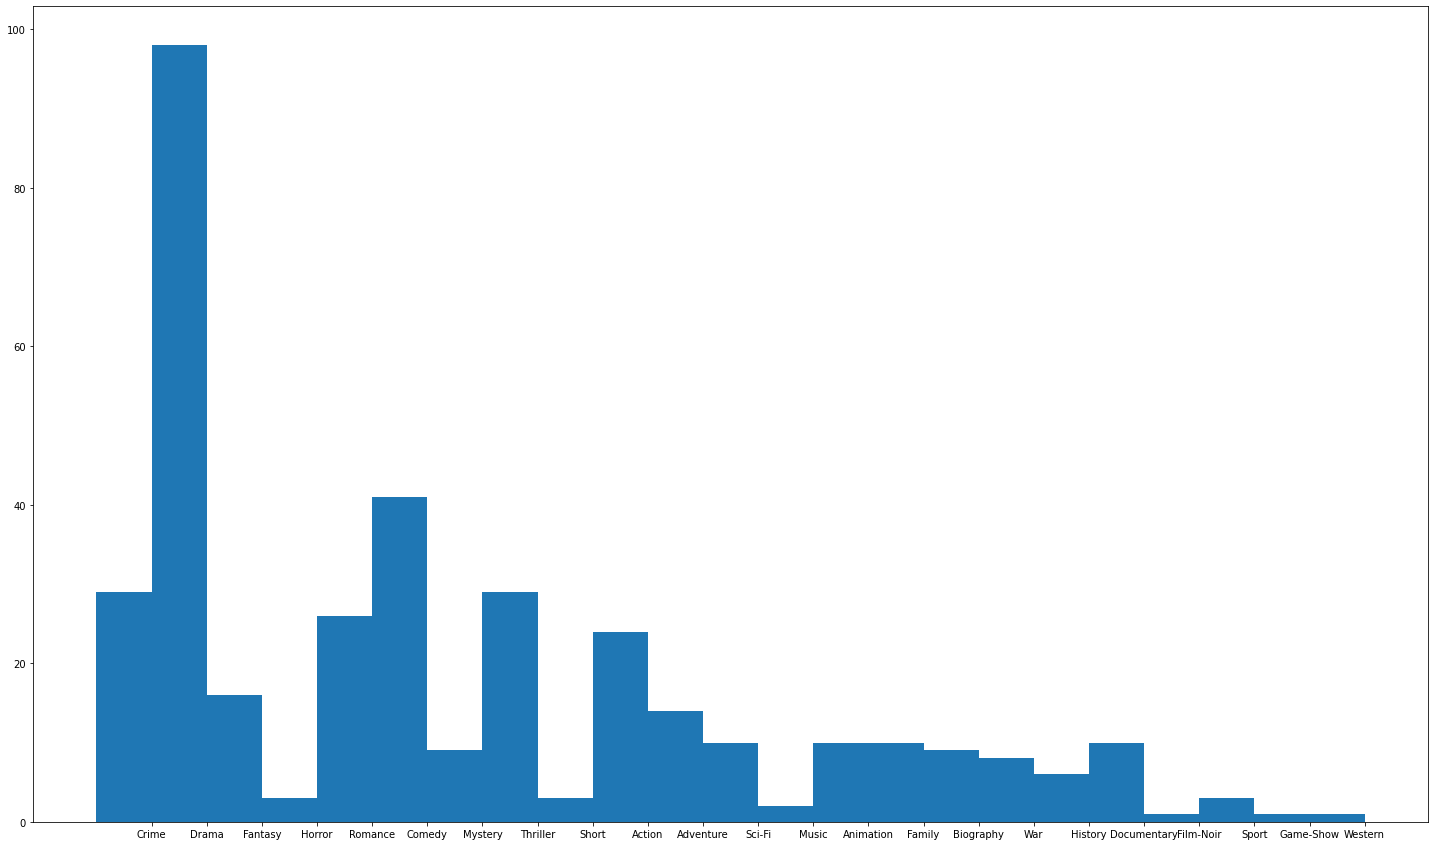

Counter({'Crime': 29,
         'Drama': 98,
         'Fantasy': 16,
         'Horror': 3,
         'Romance': 26,
         'Comedy': 41,
         'Mystery': 9,
         'Thriller': 29,
         'Short': 3,
         'Action': 24,
         'Adventure': 14,
         'Sci-Fi': 10,
         'Music': 2,
         'Animation': 10,
         'Family': 10,
         'Biography': 9,
         'War': 8,
         'History': 6,
         'Documentary': 10,
         'Film-Noir': 1,
         'Sport': 3,
         'Game-Show': 1,
         'Western': 1})

In [66]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

genre_list = []
for i in tqdm(range(len(df))):
  genre_list.extend(df['Genre'][i].split(','))
genre_list = [s.strip() for s in genre_list]

labels, values = zip(*Counter(genre_list).items())

indexes = np.arange(len(labels))
width = 1
fig, ax = plt.subplots(figsize=(25, 15))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

Counter(genre_list)